In [57]:
!pip install scikit-learn
!pip install scipy

In [58]:
#  1.Load and Explore the Data

# Load the dataset using sklearn.datasets.fetch_california_housing
from sklearn.datasets import fetch_california_housing
Cal_housing = fetch_california_housing(as_frame=True)
print(Cal_housing)

# Convert to DataFrame
df = Cal_housing.frame

#noted:
# MedInc : median income in block group - feature 
# MedHouseVal : median house value for California districts( in $100,000) - target
median_income = df['MedInc']
median_house_value = df['MedHouseVal']

print(median_income, median_house_value)


{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -1

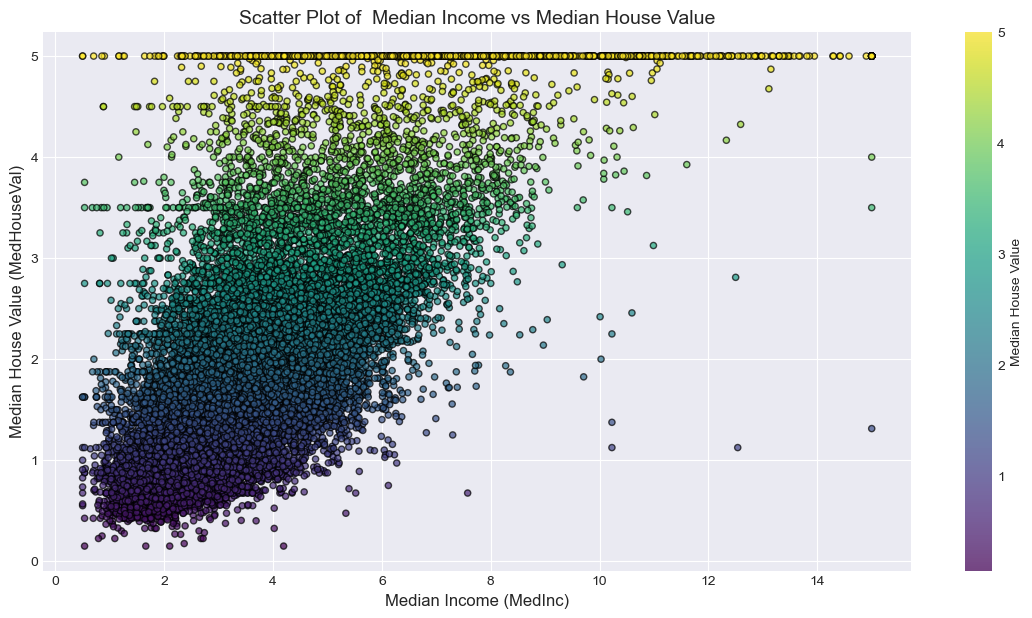

In [59]:
#2. Preprocess the Data

# plotting scatter plots between MedInc and MedHouseVal to see their relationship
import pandas as pd
import matplotlib.pyplot as plt

# Apply better visualization style
plt.style.use('seaborn-v0_8-darkgrid')

# Plot scatter plot adding edge colour and transparency to have a better visualization
plt.figure(figsize=(14, 7)) 
sc = plt.scatter(median_income, median_house_value, 
                 c=median_house_value, cmap='viridis', 
                 edgecolor='k', alpha=0.7, s=20)  # Edge color & transparency

# Adding the color bar
cbar = plt.colorbar(sc)
cbar.set_label('Median House Value')
plt.title('Scatter Plot of  Median Income vs Median House Value', fontsize=14)
plt.xlabel('Median Income (MedInc)', fontsize=12)
plt.ylabel('Median House Value (MedHouseVal)', fontsize=12)
plt.show()

In [60]:
#summary statistics on median_income
MeanValues_MedInc = median_income.mean()
MeadianValues_MedInc =median_income.median()
StdValues_MedInc = median_income.std()

# Create a DataFrame to display median_income's results
SummStats_MedInc = pd.DataFrame({ 'Statistic of median income': ['Mean', 'Median', 'Standard Deviation'],
                                'Value': [MeanValues_MedInc, MeadianValues_MedInc, StdValues_MedInc]})

print(SummStats_MedInc)

#summary statistics on median_house_value
MeanValues_MedHouseVal = median_house_value.mean()
MeadianValues_MedHouseVal =median_house_value.median()
StdValues_MedHouseVal = median_house_value.std()

# Create a DataFrame to display median_house_value's results
SummStats_MedHouseVal = pd.DataFrame({ 'Statistic of median house value': ['Mean', 'Median', 'Standard Deviation'],
                                'Value': [MeanValues_MedHouseVal, MeadianValues_MedHouseVal, StdValues_MedHouseVal]})

print(SummStats_MedHouseVal)

  Statistic of median income     Value
0                       Mean  3.870671
1                     Median  3.534800
2         Standard Deviation  1.899822
  Statistic of median house value     Value
0                            Mean  2.068558
1                          Median  1.797000
2              Standard Deviation  1.153956


Final parameters (theta):
[[2.07194693]
 [0.79851956]]
Final training MSE: 0.6991447170182823


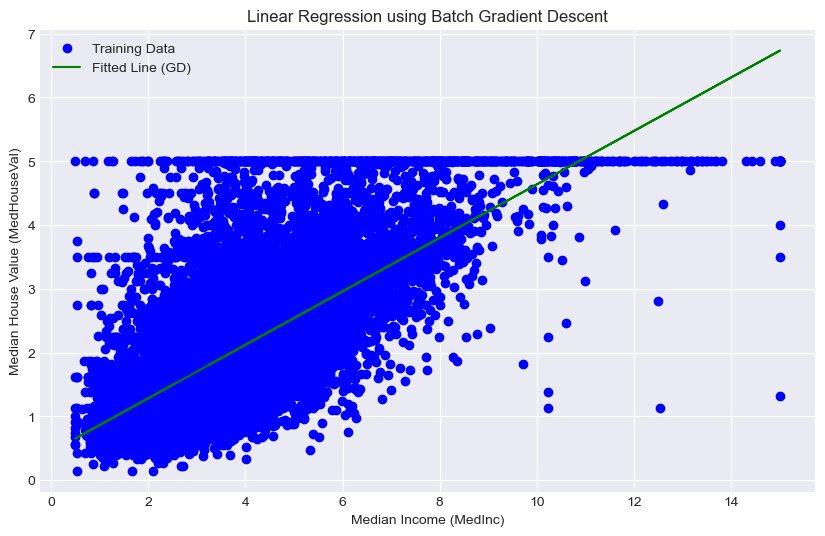

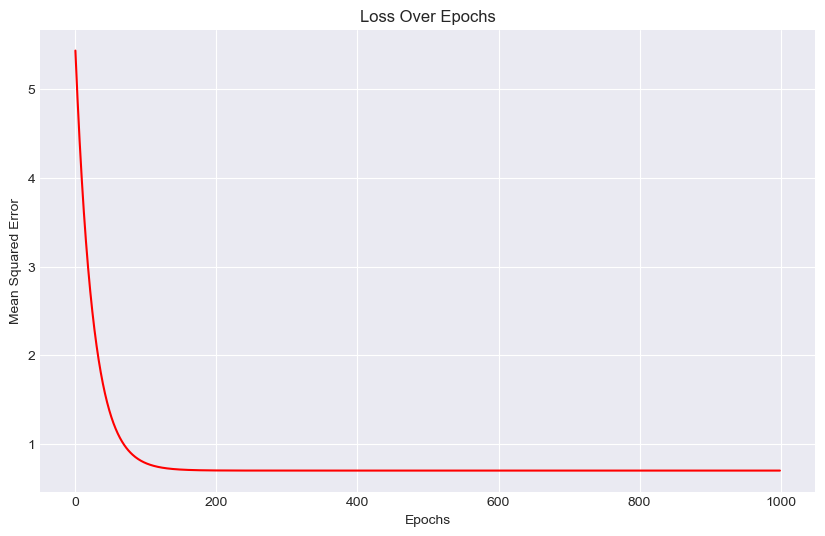

In [64]:
# 3. Build a Linear Regression Model  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# reshape to numpy arrays for both feature and target
X = df['MedInc'].values.reshape(-1, 1)  
y = df['MedHouseVal'].values.reshape(-1, 1)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# For Batch gradient decent linear regression model

# Assume df is your dataframe with 'MedInc' and 'MedHouseVal'
X = df['MedInc'].values.reshape(-1, 1)
y = df['MedHouseVal'].values.reshape(-1, 1)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Prepare data
m = len(X_train_scaled)
X_b = np.c_[np.ones((m, 1)), X_train_scaled]  # Add bias term

# Initialize weights (theta: intercept, slope)
theta = np.zeros((2, 1))

# Hyperparameters
learning_rate = 0.01
epochs = 1000

# Store loss values for plotting (loss per epoch)
loss_history = []

# Batch Gradient Descent Loop
for epoch in range(epochs):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y_train)
    theta -= learning_rate * gradients
    # Calculate loss (MSE) for this epoch and store it
    loss = np.mean((X_b.dot(theta) - y_train) ** 2)
    loss_history.append(loss)

print("Final parameters (theta):")
print(theta)
print("Final training MSE:", loss_history[-1])

# Plotting Linear Regression with Batch Gradient Descent
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.plot(X_train, X_b.dot(theta), color="green", label="Fitted Line (GD)")
plt.xlabel("Median Income (MedInc)")
plt.ylabel("Median House Value (MedHouseVal)")
plt.title("Linear Regression using Batch Gradient Descent")
plt.legend()
plt.show()

# Plot Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), loss_history, color='red')
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Loss Over Epochs")
plt.grid(True)
plt.show()

Learned weights (SGD): [[2.0979396 ]
 [0.69530746]]


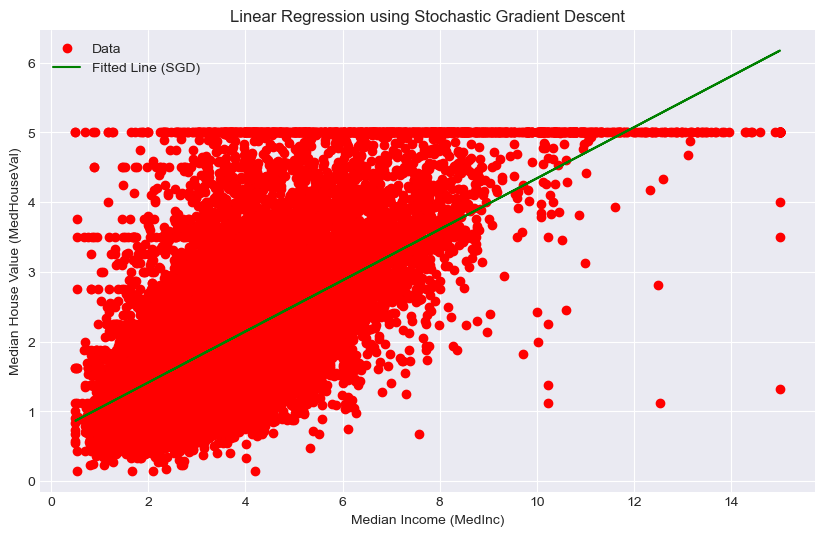

In [65]:

# Stochastic Gradient Descent (SGD) in linear regression model
from sklearn.linear_model import LinearRegression, SGDRegressor

import numpy as np

# Example dataset variables
X = np.array(df['MedInc']).reshape(-1, 1)  # Convert to 2D array
y = np.array(df['MedHouseVal']).reshape(-1, 1)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add a column of ones for the bias term
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

# Initialize weights
theta = np.zeros((X_b.shape[1], 1))

# Hyperparameters
learning_rate = 0.01
n_epochs = 100

# SGD Implementation
for epoch in range(n_epochs):
    for i in range(X_b.shape[0]):  # Iterate over samples
        random_index = np.random.randint(X_b.shape[0])  # Pick a random sample
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)  # Compute gradients
        theta -= learning_rate * gradients  # Update parameters

# Final weights
print("Learned weights (SGD):", theta)

# Visualizing the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="red", label="Data")
plt.plot(X, X_b.dot(theta), color="green", label="Fitted Line (SGD)")
plt.xlabel("Median Income (MedInc)")
plt.ylabel("Median House Value (MedHouseVal)")
plt.title("Linear Regression using Stochastic Gradient Descent")
plt.legend()
plt.show()

Epoch 0, Cost: 0.7072371565444597
Epoch 100, Cost: 0.7338542306319573
Epoch 200, Cost: 0.7246271457046588
Epoch 300, Cost: 0.7288602071411052
Epoch 400, Cost: 0.721186831228017
Epoch 500, Cost: 0.7076940287333183
Epoch 600, Cost: 0.7164250686793086
Epoch 700, Cost: 0.7024583229233825
Epoch 800, Cost: 0.7031864202019088
Epoch 900, Cost: 0.7076699564861626
Final theta from SGD: [[2.08097038]
 [0.88944889]]


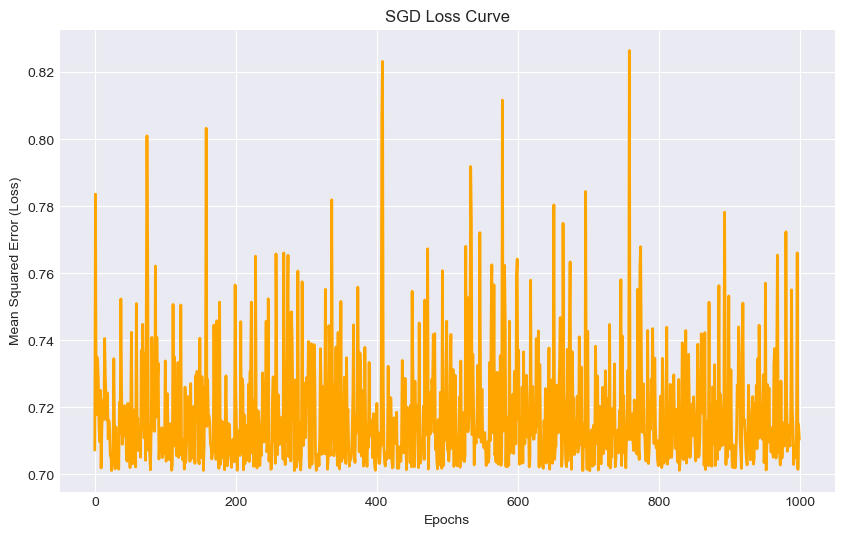

In [49]:
# The cost is calculated as the mean squared error, and the history of the cost is recorded to monitor convergence.

#Define your SGD function  
def sgd(X, y, learning_rate=0.01, epochs=1000, batch_size=1):
    m = len(X)  
# Initialize theta with random values 
    theta = np.random.randn(2, 1) 
    
# Add a bias term to X (X_0 = 1)
    X_bias = np.c_[np.ones((m, 1)), X]

    cost_history = []  

    for epoch in range(epochs):
 # Shuffle the data at the beginning of each epoch
        indices = np.random.permutation(m)
        X_shuffled = X_bias[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):  # Select a mini-batch or a single sample

            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            # Compute the gradient for the current batch
            gradients = 2 / batch_size * X_batch.T.dot(X_batch.dot(theta) - y_batch)

            # Update the parameters (theta)
            theta -= learning_rate * gradients

    # Calculate and record MSE (COST) over the whole dataset
        predictions = X_bias.dot(theta)
        cost = np.mean((predictions - y) ** 2)
        cost_history.append(cost)

        # Optionally print progress every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Cost: {cost}")

    return theta, cost_history

# Now call the SGD function using your scaled data
theta_sgd, cost_history_sgd = sgd(X_scaled, y, learning_rate=0.01, epochs=1000, batch_size=1)

print("Final theta from SGD:", theta_sgd)

# Plot the cost history to visualize the loss curve
plt.figure(figsize=(10,6))
plt.plot(range(len(cost_history_sgd)), cost_history_sgd, color='orange', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (Loss)')
plt.title('SGD Loss Curve')
plt.grid(True)
plt.show()



In [52]:
# Prepare the test set for prediction
#predict house values for test set
# Add the bias term 
X_test_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled] 

# Predict house values using Theta (learning wieght)
y_test_pred = X_test_b.dot(theta) 
print("Predicted house values for the test set:", y_test_pred)


# Predict the house value for a district with a median income of $80,000 (MedInc = 8.0)
# Median income for the district (2D array)
MedInc = np.array([[8.0]]) 
# using the trained scaler to scale the median income 
MedInc_scaled = scaler.transform(MedInc)
# Add the bias term to the scaled median income
MedInc_b = np.c_[np.ones((MedInc_scaled.shape[0], 1)), MedInc_scaled]
# Predict house value using Theta ( leanring weight)
predicted_value = MedInc_b.dot(theta)
print("Predicted house value for a district with MedInc = 8.0:", predicted_value )



Predicted house values for the test set: [[1.04248828]
 [1.42148886]
 [1.84449292]
 ...
 [4.40788503]
 [1.53459608]
 [1.87659272]]
Predicted house value for a district with MedInc = 8.0: [[3.86842052]]
